<a href="https://colab.research.google.com/github/Saxenaharsh12/ARIMA--based-Time-series-energy-demand-forecasting/blob/main/womensaftey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hossamrizk/cctv-gender-classifier-dataset")

print("Path to dataset files:", path) import kagglehub

# Download latest version
path = kagglehub.dataset_download("hossamrizk/cctv-gender-classifier-dataset")

print("Path to dataset files:", path)



SyntaxError: invalid syntax (<ipython-input-1-5237ec4f7cd3>, line 6)

In [2]:
!pip install kagglehub

In [3]:
import kagglehub




In [4]:
# Download latest version
path = kagglehub.dataset_download("hossamrizk/cctv-gender-classifier-dataset")

print("Path to dataset files:", path)


Path to dataset files: /kaggle/input/cctv-gender-classifier-dataset


In [5]:

!pip install tensorflow
!pip install keras

import os
import random
import shutil
import glob as gb
from tqdm import tqdm
from collections import Counter

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, AveragePooling2D,Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Model

from keras import Model
from keras.layers import Input

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [6]:
def visualize_random_images(male_folder, female_folder, num_images=5):
    male_images = os.listdir(male_folder)
    female_images = os.listdir(female_folder)

    fig, axes = plt.subplots(2, num_images, figsize=(15, 7))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)

    for i in range(num_images):
        male_image_path = os.path.join(male_folder, random.choice(male_images))
        female_image_path = os.path.join(female_folder, random.choice(female_images))

        male_img = plt.imread(male_image_path)
        female_img = plt.imread(female_image_path)

        axes[0, i].imshow(male_img)
        axes[0, i].axis('off')
        axes[0, i].set_title('Male')

        axes[1, i].imshow(female_img)
        axes[1, i].axis('off')
        axes[1, i].set_title('Female')

    plt.show()

In [7]:

def reduce_dataset_size(source_folder, target_folder, fraction=0.4):
    # Create target folder if it doesn't exist
    os.makedirs(target_folder, exist_ok=True)

    # Get all image file names
    all_images = os.listdir(source_folder)
    # Calculate number of images to keep
    num_images_to_keep = int(len(all_images) * fraction)

    # Randomly sample images
    selected_images = random.sample(all_images, num_images_to_keep)

    # Copy selected images to target folder
    for image in selected_images:
        shutil.copy(os.path.join(source_folder, image), os.path.join(target_folder, image))

# Paths to original and reduced dataset folders
male_folder = '/content/CCTV Gender Classifier Dataset/MALE'
female_folder = '/content/CCTV Gender Classifier Dataset/FEMALE'
reduced_male_folder = '/content/Reduced Dataset/MALE'
reduced_female_folder = '/content/Reduced Dataset/FEMALE'

# Reduce dataset size by 50% for each category
reduce_dataset_size(male_folder, reduced_male_folder, fraction=0.4)
reduce_dataset_size(female_folder, reduced_female_folder, fraction=0.4)

# Proceed with visualization or training using reduced folders
visualize_random_images(reduced_male_folder, reduced_female_folder)

FileNotFoundError: [Errno 2] No such file or directory: '/content/CCTV Gender Classifier Dataset/MALE'

In [ ]:
import kagglehub
import os
import shutil
import random

# Download dataset
path = kagglehub.dataset_download("hossamrizk/cctv-gender-classifier-dataset")
print("Downloaded path:", path)

# Define folders properly
male_folder = os.path.join(path, 'MALE')
female_folder = os.path.join(path, 'FEMALE')
reduced_male_folder = 'Reduced_Dataset/MALE'
reduced_female_folder = 'Reduced_Dataset/FEMALE'

# Function to reduce dataset size
def reduce_dataset_size(source_folder, target_folder, fraction=0.4):
    os.makedirs(target_folder, exist_ok=True)
    all_images = os.listdir(source_folder)
    num_images_to_keep = int(len(all_images) * fraction)
    selected_images = random.sample(all_images, num_images_to_keep)
    for image in selected_images:
        source_path = os.path.join(source_folder, image)
        target_path = os.path.join(target_folder, image)
        shutil.copy(source_path, target_path)

# Reduce datasets
reduce_dataset_size(male_folder, reduced_male_folder, fraction=0.4)
reduce_dataset_size(female_folder, reduced_female_folder, fraction=0.4)




In [8]:

import kagglehub
import os
import shutil
import random

# Download dataset
path = kagglehub.dataset_download("hossamrizk/cctv-gender-classifier-dataset")
print("Downloaded path:", path)
print("Files and folders inside dataset path:", os.listdir(path))

# Define correct folder paths
male_folder = os.path.join(path, 'CCTV Gender Classifier Dataset', 'MALE')
female_folder = os.path.join(path, 'CCTV Gender Classifier Dataset', 'FEMALE')

reduced_male_folder = 'Reduced_Dataset/MALE'
reduced_female_folder = 'Reduced_Dataset/FEMALE'

# Function to reduce dataset size
def reduce_dataset_size(source_folder, target_folder, fraction=0.4):
    os.makedirs(target_folder, exist_ok=True)
    all_images = os.listdir(source_folder)
    num_images_to_keep = int(len(all_images) * fraction)
    selected_images = random.sample(all_images, num_images_to_keep)
    for image in selected_images:
        source_path = os.path.join(source_folder, image)
        target_path = os.path.join(target_folder, image)
        shutil.copy(source_path, target_path)

# Reduce datasets
reduce_dataset_size(male_folder, reduced_male_folder, fraction=0.4)
reduce_dataset_size(female_folder, reduced_female_folder, fraction=0.4)


Downloaded path: /kaggle/input/cctv-gender-classifier-dataset
Files and folders inside dataset path: ['CCTV Gender Classifier Dataset']


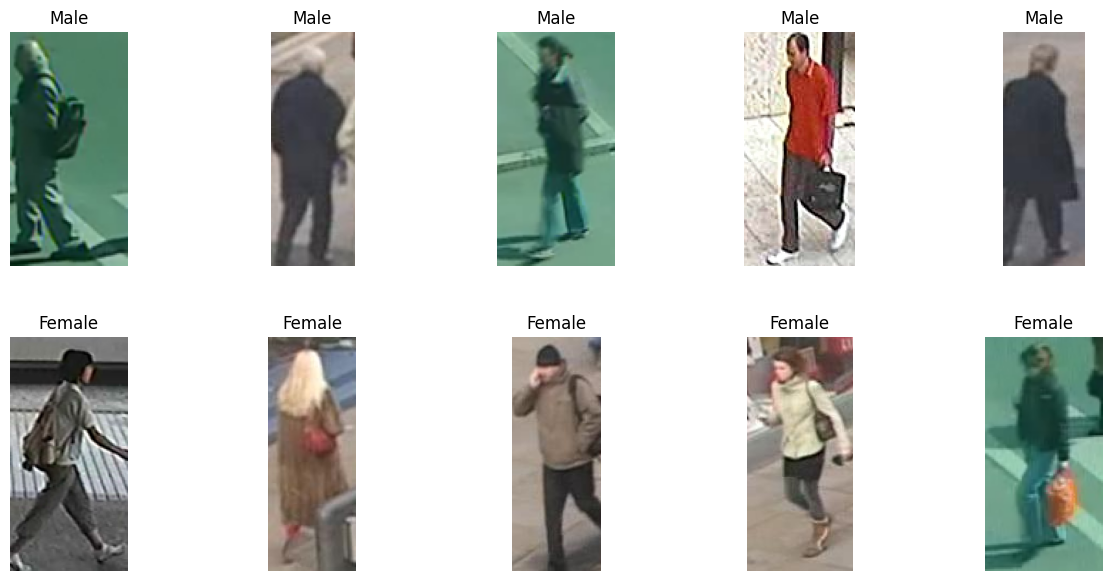

In [9]:
# Proceed with visualization or training using reduced folders
visualize_random_images(reduced_male_folder, reduced_female_folder)

In [10]:

num_male_images = len(os.listdir(reduced_male_folder))
num_female_images = len(os.listdir(reduced_female_folder))

print(f"Total number of male images: {num_male_images}")
print(f"Total number of female images: {num_female_images}")

Total number of male images: 3778
Total number of female images: 3870


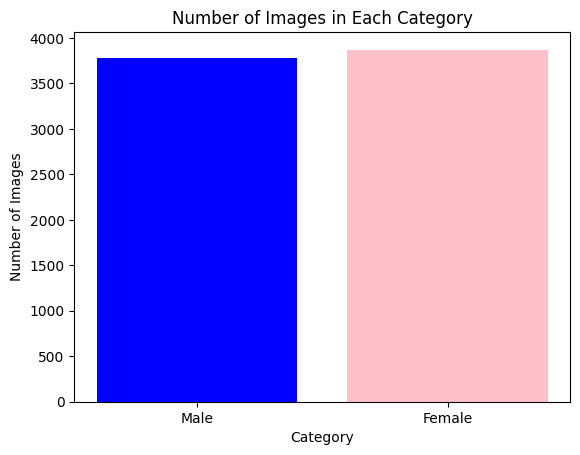

In [11]:
# Create bar plot
categories = ['Male', 'Female']
num_images = [num_male_images, num_female_images]

plt.bar(categories, num_images, color=['blue', 'pink'])
plt.xlabel('Category')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Category')
plt.show()

In [12]:
DataPath = '/content/Reduced Dataset'

labels2int={"MALE":0,"FEMALE":1}
int2labels={0:"MALE",1:"FEMALE"}

Data = []
Classes = []

# Iterate through each folder in DataPath
for folder in os.listdir(DataPath):
    print(folder)

    # Construct the full path to the folder
    folder_path = os.path.join(DataPath, folder)

    # Get a list of all files in the folder
    files = os.listdir(folder_path)

    print(f"Data found {len(files)} in {folder}")

    # Iterate through each file in the folder
    for file in files:
        # Construct the full path to the file
        file_path = os.path.join(folder_path, file)

        # Load the image, resize it, and convert it to an array
        img = load_img(file_path, target_size=(200, 100))
        img_array = img_to_array(img)

        # Preprocess the image array
        img_array = preprocess_input(img_array)

        # Append the preprocessed image array to the Data list
        Data.append(img_array)

        # Append the label to the Classes list based on the folder name
        Classes.append(labels2int[folder])

MALE
Data found 0 in MALE


In [13]:
import os

DataPath = '/content/Reduced Dataset'

print("Contents inside DataPath:")

print(os.listdir(DataPath))


Contents inside DataPath:
['MALE']


In [14]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
import os

# Correct Path
DataPath = 'Reduced_Dataset'

labels2int = {"MALE": 0, "FEMALE": 1}
int2labels = {0: "MALE", 1: "FEMALE"}

Data = []
Classes = []

# Iterate through each folder in DataPath
for folder in os.listdir(DataPath):
    print(folder)

    folder_path = os.path.join(DataPath, folder)
    files = os.listdir(folder_path)

    print(f"Data found {len(files)} in {folder}")

    for file in files:
        file_path = os.path.join(folder_path, file)

        img = load_img(file_path, target_size=(200, 100))
        img_array = img_to_array(img)
        img_array = preprocess_input(img_array)

        Data.append(img_array)
        Classes.append(labels2int[folder])


MALE
Data found 3778 in MALE
FEMALE
Data found 3870 in FEMALE


In [15]:
lb = LabelBinarizer()
Classes = lb.fit_transform(Classes)
Classes = to_categorical(Classes)

In [16]:
print("Shape of Classes after binarization and conversion:", Classes.shape)

Shape of Classes after binarization and conversion: (7648, 2)


In [17]:

Data = np.array(Data,dtype = "float32")
Classes = np.array(Classes)
trainx,testx,trainy,testy = train_test_split(Data,Classes,test_size=0.20,
                                             random_state=42)
print("Shape of training data (trainx):", trainx.shape)
print("Shape of testing data (testx):", testx.shape)
print("Shape of training labels (trainy):", trainy.shape)
print("Shape of testing labels (testy):", testy.shape)

Shape of training data (trainx): (6118, 200, 100, 3)
Shape of testing data (testx): (1530, 200, 100, 3)
Shape of training labels (trainy): (6118, 2)
Shape of testing labels (testy): (1530, 2)


In [18]:
Data = np.array(Data,dtype = "float32")
Classes = np.array(Classes)

# Split data into training and testing sets (80% train, 20% test)- If you use random_state=42 today and tomorrow → your splits will be identical.
# Without setting random_state → every time you run the notebook, you'll get a different split

Data_train, Data_test, Classes_train, Classes_test = train_test_split(Data, Classes, test_size=0.2, random_state=42)

# Split training data into training and validation sets (80% train, 20% validation)
Data_train, Data_val, Classes_train, Classes_val = train_test_split(Data_train, Classes_train, test_size=0.2, random_state=42)

print("Shape of training data (Data_train):", Data_train.shape)
print("Shape of Validation data (Data_val):", Data_val.shape)
print("Shape of testing data (Data_test):", Data_test.shape)
print('=============================================================')
print("Shape of training labels (Classes_train):", Classes_train.shape)
print("Shape of Validation labels (Classes_test):", Classes_val.shape)
print("Shape of testing labels (Classes_test):", Classes_test.shape)


Shape of training data (Data_train): (4894, 200, 100, 3)
Shape of Validation data (Data_val): (1224, 200, 100, 3)
Shape of testing data (Data_test): (1530, 200, 100, 3)
Shape of training labels (Classes_train): (4894, 2)
Shape of Validation labels (Classes_test): (1224, 2)
Shape of testing labels (Classes_test): (1530, 2)


In [19]:

def resnet50_modelarch():
    lr = 1e-5      #lr (learning rate): The learning rate for the Adam optimizer is set to 1e-5 (0.00001). A smaller learning rate generally helps with more precise updates during training.
    epochs = 10

    basemodel= ResNet50(include_top=False, input_shape=(200,100,3))
    headmodel= basemodel.output
    headmodel= AveragePooling2D(pool_size=(3,3))(headmodel)

    #headmodel = Dense(1024, activation="relu")(headmodel)
    #headmodel = Dropout(0.3)(headmodel)
    headmodel = Flatten(name="flatten")(headmodel)
    headmodel = Dense(512, activation="relu")(headmodel)
    headmodel = Dropout(0.3)(headmodel)
    headmodel = Dense(256, activation="relu")(headmodel)
    headmodel = Dropout(0.3)(headmodel)
    headmodel = Dense(128, activation="relu")(headmodel)
    headmodel = Dropout(0.3)(headmodel)
    headmodel = Dense(64, activation="relu")(headmodel)
    #headmodel = Dropout(0.3)(headmodel)
    headmodel = Dense(2, activation='softmax')(headmodel)

    model=Model(inputs=basemodel.input, outputs=headmodel)

    for layer in basemodel.layers:
        layer.trainable=False

    opt=Adam(learning_rate=lr, decay=lr / epochs)
    model.compile(loss="binary_crossentropy",optimizer=opt,metrics=["accuracy"])
    callback = EarlyStopping(monitor='val_loss',patience=6)

    return model,callback,epochs

In [20]:
model,callback,Epochs = resnet50_modelarch()
model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 200, 100,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 206, 106,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 100, 50,   │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 100, 50,   │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 100, 50,   │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 102, 52,   │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 50, 25,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 50, 25,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 50, 25,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 50, 25,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 50, 25,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 50, 25,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 50, 25,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 50, 25,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 50, 25,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 50, 25,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 50, 25,    │      1,024 │ conv2_block1_3_c

 Total params: 25,857,986 (98.64 MB)

 Trainable params: 2,270,274 (8.66 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [21]:

history = model.fit(Data_train,Classes_train,
                    batch_size=32,
                    validation_data=(Data_val,Classes_val),
                    epochs=25,callbacks=[callback])

Epoch 1/25
153/153 ━━━━━━━━━━━━━━━━━━━━ 38s 144ms/step - accuracy: 0.5177 - loss: 0.8931 - val_accuracy: 0.6029 - val_loss: 0.6948
Epoch 2/25
153/153 ━━━━━━━━━━━━━━━━━━━━ 20s 54ms/step - accuracy: 0.5623 - loss: 0.7290 - val_accuracy: 0.6560 - val_loss: 0.6620
Epoch 3/25
153/153 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - accuracy: 0.5898 - loss: 0.6987 - val_accuracy: 0.6871 - val_loss: 0.6423
Epoch 4/25
153/153 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - accuracy: 0.6178 - loss: 0.6776 - val_accuracy: 0.6895 - val_loss: 0.6224
Epoch 5/25
153/153 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - accuracy: 0.6381 - loss: 0.6520 - val_accuracy: 0.6993 - val_loss: 0.6045
Epoch 6/25
153/153 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - accuracy: 0.6505 - loss: 0.6441 - val_accuracy: 0.7083 - val_loss: 0.5889
Epoch 7/25
153/153 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - accuracy: 0.6717 - loss: 0.6264 - val_accuracy: 0.7075 - val_loss: 0.5729
Epoch 8/25
153/153 ━━━━━━━━━━━━━━━━━━━━ 9s 61ms/step - accuracy: 0.6852 - loss: 0.6002 - v

Epoch 1/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 31s 123ms/step - accuracy: 0.5230 - loss: 0.8264 - val_accuracy: 0.5989 - val_loss: 0.6824
Epoch 2/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 27s 62ms/step - accuracy: 0.5725 - loss: 0.7247 - val_accuracy: 0.6642 - val_loss: 0.6507
Epoch 3/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - accuracy: 0.6001 - loss: 0.6930 - val_accuracy: 0.6944 - val_loss: 0.6250
Epoch 4/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 11s 62ms/step - accuracy: 0.6123 - loss: 0.6679 - val_accuracy: 0.7059 - val_loss: 0.6048
Epoch 5/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step - accuracy: 0.6525 - loss: 0.6412 - val_accuracy: 0.7132 - val_loss: 0.5864
Epoch 6/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 9s 61ms/step - accuracy: 0.6692 - loss: 0.6214 - val_accuracy: 0.7214 - val_loss: 0.5650
Epoch 7/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step - accuracy: 0.6932 - loss: 0.6041 - val_accuracy: 0.7288 - val_loss: 0.5475
Epoch 8/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - accuracy: 0.6997 - loss: 0.5942 - val_

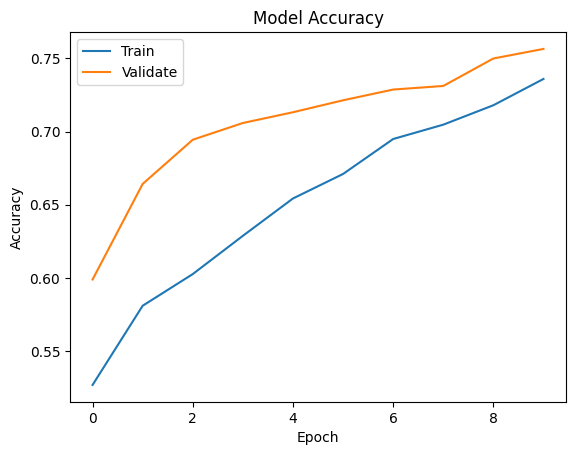

In [22]:
# Step 1: Create the model
model, callback, epochs = resnet50_modelarch()

# Step 2: Train the model
history = model.fit(
    Data_train, Classes_train,
    validation_data=(Data_val, Classes_val),
    epochs=epochs,
    callbacks=[callback]
)

# Step 3: Plot accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()


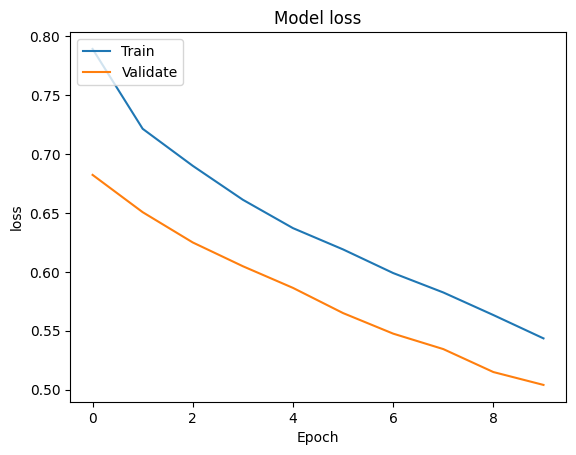

In [23]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

In [24]:
scores = model.evaluate(Data_test,Classes_test, verbose=1)
print("ResNet50 Score:",scores[1])

48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.7268 - loss: 0.5402
ResNet50 Score: 0.7267974019050598


In [25]:
predIdxs = model.predict(Data_test,batch_size=32)
predIdxs=np.argmax(predIdxs,axis=1)


48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 132ms/step


In [26]:
from sklearn.metrics import classification_report,confusion_matrix
testy_res = Classes_test.argmax(axis=1)
CR = classification_report(testy_res, predIdxs)
print(CR)

              precision    recall  f1-score   support

           0       0.72      0.76      0.74       775
           1       0.74      0.69      0.71       755

    accuracy                           0.73      1530
   macro avg       0.73      0.73      0.73      1530
weighted avg       0.73      0.73      0.73      1530



In [ ]:
# Get predictions for the test set
predictions = model.predict(Data_test)

# Convert predictions to class labels (0 for male, 1 for female)
predicted_labels = np.argmax(predictions, axis=1)

# Compare predicted labels with true labels
correct_predictions = np.sum(predicted_labels == np.argmax(Classes_test, axis=1))
total_samples = len(Classes_test)

# Calculate accuracy
accuracy = correct_predictions / total_samples
print("Test Accuracy:", accuracy)

In [27]:

class_names=['MALE','FEMALE']

In [28]:


import random
def plot_prediction(Data_test, Classes_test, n_images, class_names):
    """
    Test the model on random predictions and plot the results.

    Args:
        Data_test (numpy array): The test images data.
        Classes_test (numpy array): The true labels for the test images.
        n_images (int): Number of images to plot.
        class_names (list): List of class names.
    """
    # Get the total number of test images
    num_images = len(Data_test)

    # Randomly select indices for the images to plot
    random_indices = random.sample(range(num_images), n_images)

    # Make predictions on the selected test data
    predictions = np.argmax(model.predict(Data_test[random_indices]), axis=1)

    # Plot the randomly selected images along with their true labels and predictions
    plt.figure(figsize=(14, 15))
    for i, idx in enumerate(random_indices):
        plt.subplot(4, 3, i+1)
        plt.imshow(Data_test[idx])
        if predictions[i] == np.argmax(Classes_test[idx]):
            title_color = 'g'  # green color for correct predictions
        else:
            title_color = 'r'  # red color for incorrect predictions
        plt.title(class_names[np.argmax(Classes_test[idx])], color=title_color)
        plt.axis('off')

    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


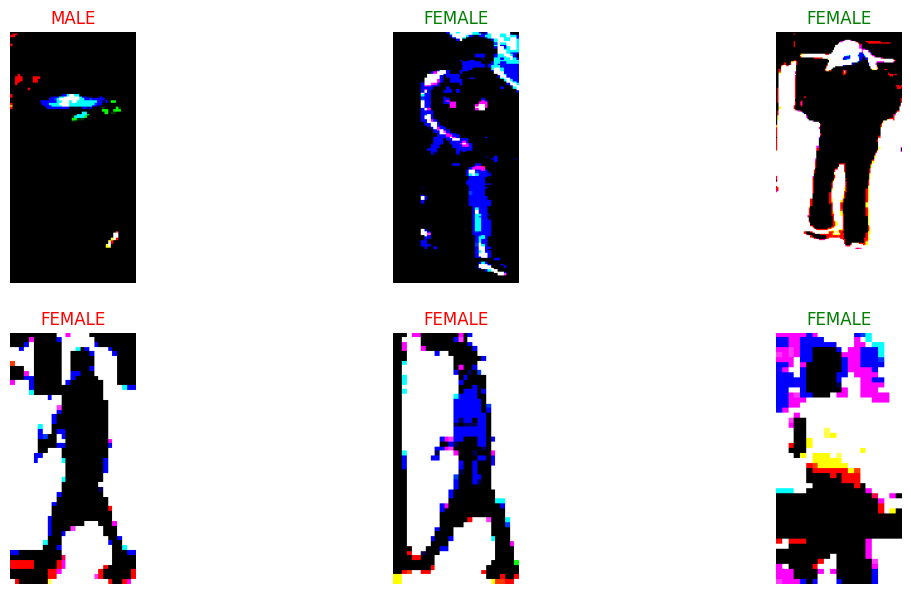

In [29]:


plot_prediction(Data_test, Classes_test, n_images=6, class_names=class_names)

In [30]:
model.save("GenderClassification.h5")

In [31]:
!pip install ultralytics
import os
import cv2
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
from ultralytics import YOLO
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 47.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 62.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 618.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 53.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [32]:
# Load YOLOv8 model for person detection
yolo_model = YOLO('/content/best.pt')

# Load the Keras model for gender classification
resnet_model = load_model('/content/GenderClassification.h5')

FileNotFoundError: [Errno 2] No such file or directory: '/content/best.pt'